In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from itertools import chain

In [3]:
data = pd.read_csv('movie_bd_v5.csv', encoding='utf_8')
data.sample(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [4]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [5]:
answers = {}  # создадим словарь для ответов

# тут другие ваши предобработки колонок например:

# the time given in the dataset is in string format.
# So we need to change this in datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# создадим столбец с прибылью и поставим его сразу после бюджета и выручки
data['profit'] = data['revenue'] - data['budget']
data = data[['imdb_id', 'budget', 'revenue', 'profit', 'original_title', 'cast', 'director', 'tagline',
             'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_average', 'release_year']]

# Создадим датафрейм из столбца "genre" разбив его на столбцы, в которых перечислены все жанры относящиеся к каждому фильму
allgenres = data['genres'].str.split('|', expand=True)
allgenres.columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5']

# Создадим новый датафрейм, из первоначального 'data', путем присоединения столбцов датафрейма 'allgenres'
allmovies = pd.concat([data, allgenres], axis=1)

# Уберем первоначальный столбец 'genres'
allmovies = allmovies.drop('genres', axis=1)

# создадим в исходном датафрейме столбец с месяцем выхода кинофильма
data['release_month'] = data.release_date.dt.month

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [6]:
# в словарь вставляем номер вопроса и ответ на него
answers['1'] = '5. Pirates of the Caribbean: On Stranger Tides (tt1298650)'

In [7]:
# тут пишем ваш код для решения данного вопроса:
display(data.original_title[data.budget == data.budget.max()])

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

In [8]:
# ВАРИАНТ 2
display(data.sort_values(
    by=['budget', 'original_title'], ascending=False).head())

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
723,tt1298650,380000000,1021683000,641683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,6.3,2011,5
1669,tt0449088,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,6.8,2007,5
14,tt2395427,280000000,1405035767,1125035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,7.4,2015,4
380,tt0398286,260000000,591794936,331794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2010-11-24,7.3,2010,11
1014,tt0401729,260000000,284139100,24139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,Lost in Our World. Found in Another.,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,2012-03-07,6.0,2012,3


Text(0, 0.5, 'Budget')

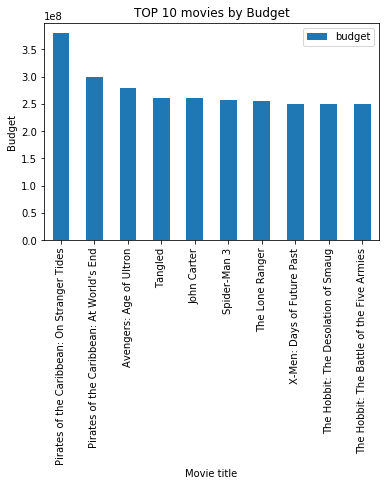

In [9]:
# Визуализация
data_plot = data.sort_values(by=['budget', 'original_title'], ascending=False)[
    ['budget', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 movies by Budget')
plot.set_xlabel('Movie title')
plot.set_ylabel('Budget')

# 2. Какой из фильмов самый длительный (в минутах)?

In [10]:
answers['2'] = '2. Gods and Generals (tt0279111)'

In [11]:
display(data.original_title[data.runtime == data.runtime.max()])

1157    Gods and Generals
Name: original_title, dtype: object

In [12]:
# ВАРИАНТ 2
display(data.sort_values('runtime', ascending=False).head())

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
1157,tt0279111,56000000,12923936,-43076064,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,The film centers mostly around the personal an...,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2003-02-21,5.8,2003,2
1081,tt0167260,94000000,1118888979,1024888979,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,The eye of the enemy is moving.,Aragorn is revealed as the heir to the ancient...,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,2003-12-01,7.9,2003,12
1736,tt0462322,67000000,25037897,-41962103,Grindhouse,Kurt Russell|ZoÃ« Bell|Rosario Dawson|Vanessa ...,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,A double feature that'll tear you in two!,Two full length feature horror movies written ...,191,Thriller|Action|Horror,Big Talk Productions|Yer Dead Productions|Wein...,2007-04-06,6.5,2007,4
1336,tt0360717,207000000,550000000,343000000,King Kong,Naomi Watts|Jack Black|Adrien Brody|Thomas Kre...,Peter Jackson,The eighth wonder of the world.,"In 1933 New York, an overly ambitious movie pr...",187,Adventure|Drama|Action,WingNut Films|Universal Pictures|Big Primate P...,2005-12-14,6.4,2005,12
504,tt0213149,140000000,449220945,309220945,Pearl Harbor,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,Michael Bay,"December 7, 1941 - A day that shall live in in...",The lifelong friendship between Rafe McCawley ...,183,History|Romance|War,Jerry Bruckheimer Films|Touchstone Pictures,2001-05-21,6.6,2001,5


Text(0, 0.5, 'Runtime, min')

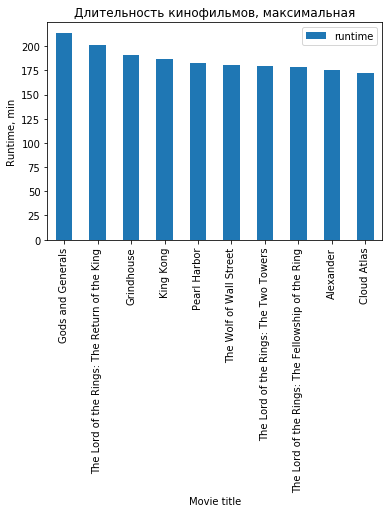

In [13]:
# Визуализация
data_plot = data.sort_values('runtime', ascending=False)[
    ['runtime', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('Длительность кинофильмов, максимальная')
plot.set_xlabel('Movie title')
plot.set_ylabel('Runtime, min')

# 3. Какой из фильмов самый короткий (в минутах)?





In [14]:
answers['3'] = '3. Winnie the Pooh (tt1449283)'

In [15]:
display(data.sort_values('runtime').head())

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
768,tt1449283,30000000,14460000,-15540000,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,"During an ordinary day in Hundred Acre Wood, W...",63,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2011-04-13,6.8,2011,4
930,tt0280030,20000000,109862682,89862682,Return to Never Land,Harriet Owen|Blayne Weaver|Jeff Bennett|Kath S...,Robin Budd|Donovan Cook,The Classic Continues,The classic tale of 'Peter Pan' continues in D...,72,Adventure|Fantasy|Animation|Family,Walt Disney Pictures|Walt Disney Television An...,2002-02-14,6.2,2002,2
1097,tt0283426,20000000,135680000,115680000,The Jungle Book 2,John Goodman|Haley Joel Osment|Mae Whitman|Phi...,Steve Trenbirth,Feel the jungle beat,"Mowgli, missing the jungle and his old friends...",72,Family|Animation|Adventure,Walt Disney Pictures|Walt Disney Television An...,2003-02-07,5.6,2003,2
1408,tt0361089,35000000,19478106,-15521894,Valiant,Ewan McGregor|Ricky Gervais|Tim Curry|Jim Broa...,Gary Chapman,"Some pigeons eat crumbs, others make history.",The animated comedy tells the story of a lowly...,76,Animation|Family|Adventure,Vanguard Films|Scanbox,2005-03-25,5.3,2005,3
1626,tt0299172,110000000,103951461,-6048539,Home on the Range,Randy Quaid|Steve Buscemi|Judi Dench|Cuba Good...,Will Finn|John Sanford,Bust a Moo.,The Little Piece of Heaven family farm is abou...,76,Western|Animation|Family|Comedy|Music,Walt Disney Pictures|Walt Disney Feature Anima...,2004-04-02,5.8,2004,4


Text(0, 0.5, 'Runtime, min')

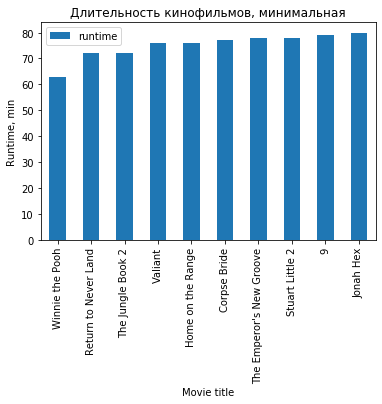

In [16]:
# Визуализация
data_plot = data.sort_values(
    'runtime')[['runtime', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('Длительность кинофильмов, минимальная')
plot.set_xlabel('Movie title')
plot.set_ylabel('Runtime, min')

# 4. Какова средняя длительность фильмов?


In [17]:
answers['4'] = '2. 110'

In [18]:
display(data.runtime.mean())

109.6585494970884

# 5. Каково медианное значение длительности фильмов? 

In [19]:
answers['5'] = '1. 107'

In [20]:
display(data.runtime.median())

107.0

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [21]:
answers['6'] = '5. Avatar (tt0499549)'

In [22]:
# ВАРИАНТ 1
display(data.sort_values('profit', ascending=False).head())

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
239,tt0499549,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,12
3,tt2488496,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,12
0,tt0369610,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,6
4,tt2820852,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,4
970,tt0848228,220000000,1519557910,1299557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,7.3,2012,4


In [23]:
# ВАРИАНТ 2
display(data[data.profit == data.profit.max()])

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
239,tt0499549,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,12


Text(0, 0.5, 'Profit')

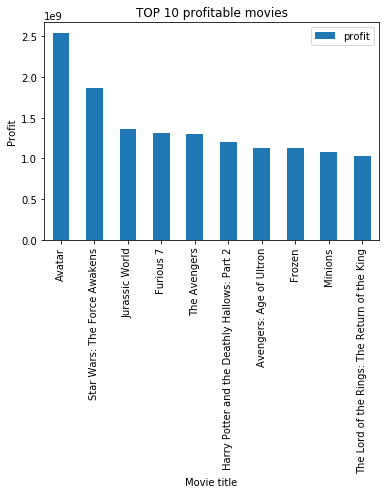

In [24]:
# Визуализация
data_plot = data.sort_values('profit', ascending=False)[
    ['profit', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 profitable movies')
plot.set_xlabel('Movie title')
plot.set_ylabel('Profit')

# 7. Какой фильм самый убыточный? 

In [25]:
answers['7'] = '5. The Lone Ranger (tt1210819)'

In [26]:
# ВАРИАНТ 1
display(data.sort_values('profit').head())

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
1245,tt1210819,255000000,89289910,-165710090,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,7
1616,tt0318974,145000000,25819961,-119180039,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,You will never forget,Based on the 1836 standoff between a group of ...,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,5.9,2004,4
809,tt1305591,150000000,38992758,-111007242,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,Mom needs a little space.,"When Martians suddenly abduct his mom, mischie...",88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,5.5,2011,3
958,tt0180052,100000000,7103973,-92896027,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,Action's future has arrived...,"The year is 2087, the setting is the moon. Edd...",95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,4.6,2002,8
1464,tt0424095,149000000,64459316,-84540684,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,David Bowers|Sam Fell,Someone's Going Down,"London high-society mouse, Roddy is flushed do...",85,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,2006-10-22,6.0,2006,10


In [27]:
# ВАРИАНТ 2
display(data[data.profit == data.profit.min()])

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
1245,tt1210819,255000000,89289910,-165710090,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Never Take Off the Mask,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,7


Text(0, 0.5, 'Profit')

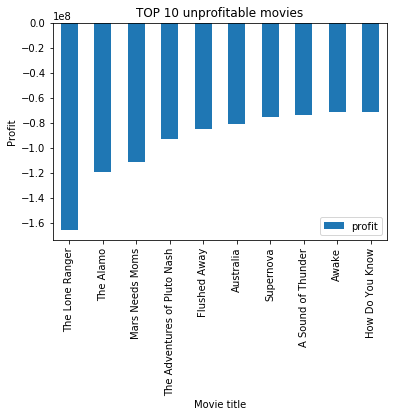

In [28]:
# Визуализация
data_plot = data.sort_values(
    'profit')[['profit', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 unprofitable movies')
plot.set_xlabel('Movie title')
plot.set_ylabel('Profit')

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [29]:
answers['8'] = '1. 1478'

In [30]:
print(len(data[data.profit > 0]))

1478


# 9. Какой фильм оказался самым кассовым в 2008 году?

In [31]:
answers['9'] = '4. The Dark Knight (tt0468569)'

In [32]:
# ВАРИАНТ 1
movies_2008 = data[data.release_year == 2008]
display(movies_2008[['imdb_id', 'original_title']]
        [movies_2008.revenue == movies_2008.revenue.max()])

,imdb_id,original_title
599,tt0468569,The Dark Knight


In [33]:
# ВАРИАНТ 2
data.query('release_year == 2008').sort_values('revenue', ascending=False).iloc[0]

imdb_id                                                         tt0468569
budget                                                          185000000
revenue                                                        1001921825
profit                                                          816921825
original_title                                            The Dark Knight
cast                    Christian Bale|Michael Caine|Heath Ledger|Aaro...
director                                                Christopher Nolan
tagline                                                   Why So Serious?
overview                Batman raises the stakes in his war on crime. ...
runtime                                                               152
genres                                        Drama|Action|Crime|Thriller
production_companies    DC Comics|Legendary Pictures|Warner Bros.|Syncopy
release_date                                          2008-07-16 00:00:00
vote_average                          

Text(0, 0.5, 'Revenue')

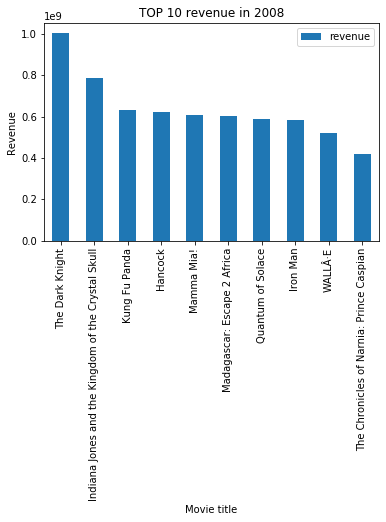

In [34]:
# Визуализация
data_plot = data.query('release_year == 2008').sort_values(
    'revenue', ascending=False)[['revenue', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 revenue in 2008')
plot.set_xlabel('Movie title')
plot.set_ylabel('Revenue')

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [35]:
answers['10'] = '5. The Lone Ranger (tt1210819)'

In [36]:
data.query('2012 <= release_year <= 2014').sort_values('profit').iloc[0]

imdb_id                                                         tt1210819
budget                                                          255000000
revenue                                                          89289910
profit                                                         -165710090
original_title                                            The Lone Ranger
cast                    Johnny Depp|Armie Hammer|William Fichtner|Hele...
director                                                   Gore Verbinski
tagline                                           Never Take Off the Mask
overview                The Texas Rangers chase down a gang of outlaws...
runtime                                                               149
genres                                           Action|Adventure|Western
production_companies    Walt Disney Pictures|Jerry Bruckheimer Films|I...
release_date                                          2013-07-03 00:00:00
vote_average                          

Text(0, 0.5, 'Profit')

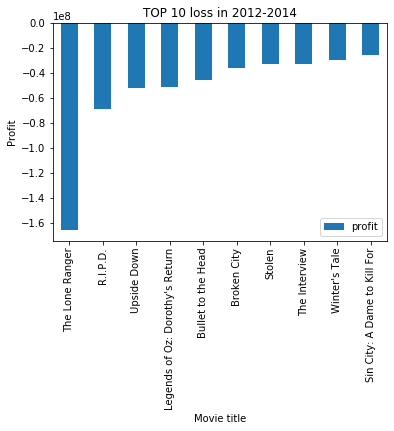

In [37]:
# Визуализация
data_plot = data.query('2012 <= release_year <= 2014').sort_values(
    'profit')[['profit', 'original_title']][:10].copy()
data_plot.set_index('original_title', inplace=True)
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 loss in 2012-2014')
plot.set_xlabel('Movie title')
plot.set_ylabel('Profit')

# 11. Какого жанра фильмов больше всего?

In [38]:
answers['11'] = '3. Drama'

In [39]:
# ВАРИАНТ 1

# Создадим датафрейм из столбца "genre" разбив его на столбцы, в которых перечислены все жанры относящиеся к каждому фильму
allgenres = data['genres'].str.split('|', expand=True)

# Применим value_counts к каждому столбцу, транспонируем с целью суммирования, затем просуммируем и отсортируем,
# затем отобразим слайс из первого элемента
allgenres.apply(lambda x: x.value_counts()).T.sum().sort_values(ascending=False)[:1]

Drama    782.0
dtype: float64

In [40]:
# ВАРИАНТ 2

# Создадим список из всех перечисленных в записях жанров путем разбиения записей столбца 'genres' в списки
# и последующего суммирования Series
# посчитаем упоминания жанров в списке Counter'ом и отсортируем наиболее упоминаемые, возьмем первый элемент
Counter(data.genres.apply(lambda x: x.split('|')).sum()).most_common()[0]

('Drama', 782)

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [41]:
answers['12'] = '1. Drama'

In [42]:
allmovies[allmovies.profit > 0][['genre1', 'genre2', 'genre3', 'genre4', 'genre5']].apply(
    lambda x: x.value_counts()).T.sum().sort_values(ascending=False)

Drama              560.0
Comedy             551.0
Thriller           446.0
Action             444.0
Adventure          337.0
Romance            242.0
Crime              231.0
Family             226.0
Science Fiction    195.0
Fantasy            188.0
Horror             150.0
Animation          120.0
Mystery            119.0
Music               47.0
History             46.0
War                 41.0
Western             12.0
Documentary          7.0
dtype: float64

Text(0, 0.5, '')

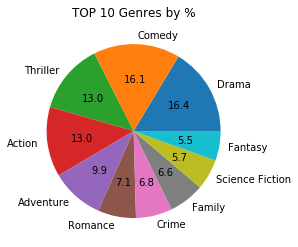

In [43]:
# ВИЗУАЛИЗАЦИЯ
plot = allmovies[allmovies.profit > 0][['genre1', 'genre2', 'genre3', 'genre4', 'genre5']].apply(
    lambda x: x.value_counts()).T.sum().sort_values(ascending=False)[:10].plot(kind='pie', autopct='%.1f')
plot.set_title('TOP 10 Genres by %')
plot.set_xlabel('')
plot.set_ylabel('')

# 13. У какого режиссера самые большие суммарные кассовые сборы?

In [44]:
answers['13'] = '5. Peter Jackson'

In [45]:
# Конвертируем значения столбца 'director' в списки, разбив множественные значения
allmovies['director'] = allmovies['director'].str.split('|')

# Применим метод explode, продублируем строки, где есть более одного режиссера
# Затем сгруппируем по режиссерам и просуммируем выручку
allmovies.explode('director').groupby('director').revenue.sum().sort_values(ascending=False)[:1]

director
Peter Jackson    6490593685
Name: revenue, dtype: int64

In [46]:
# ВАРИАНТ 2

# Создадим список уникальных значений столбца 'director'

dirs = np.unique(data.director.str.split('|')).sum()

# Словарь в который будем добавлять сумму сборов по режиссеру
revenues = {}

# Пройдемся по списку режиссеров, суммируя соотвествующую выручку в исходном датафреймем
for person in dirs:
    revenues[person] = data[data.director.str.contains(person)].revenue.sum()

# Отсортируем получившийся словарь
dict(sorted(revenues.items(), key=lambda x: x[1],  reverse=True))

{'Peter Jackson': 6490593685,
 'Christopher Nolan': 4167548502,
 'David Yates': 4154295625,
 'Michael Bay': 3886938960,
 'J.J. Abrams': 3579169916,
 'Gore Verbinski': 3426362290,
 'Steven Spielberg': 3386700791,
 'McG': 3323121992,
 'Ridley Scott': 3264035909,
 'Francis Lawrence': 3179979588,
 'Sam Raimi': 3091066354,
 'Joss Whedon': 2924593677,
 'James Cameron': 2798546718,
 'Pierre Coffin': 2671006832,
 'Tim Burton': 2610663457,
 'Andrew Adamson': 2572706346,
 'Lee Unkrich': 2490614145,
 'Chris Columbus': 2354968952,
 'Sam Mendes': 2342352791,
 'Carlos Saldanha': 2289719105,
 'Eric Darnell': 2257054393,
 'Shawn Levy': 2218587063,
 'Tom McGrath': 2205388064,
 'Brad Bird': 2158913958,
 'Pete Docter': 2147867609,
 'Ron Howard': 2133257991,
 'Steven Soderbergh': 2074928588,
 'Conrad Vernon': 2048269902,
 'Roland Emmerich': 2000587076,
 'Justin Lin': 1953947074,
 'Clint Eastwood': 1900566334,
 'James Wan': 1863441367,
 'Chris Renaud': 1863116186,
 'M. Night Shyamalan': 1779548638,
 'Bill 

Text(0, 0.5, 'Revenue')

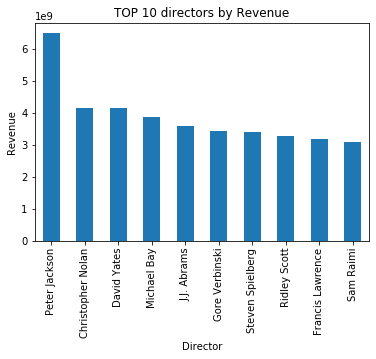

In [47]:
# Визуализация
data_plot = allmovies.explode('director').groupby('director').revenue.sum().sort_values(ascending=False)[:10].copy()
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 directors by Revenue')
plot.set_xlabel('Director')
plot.set_ylabel('Revenue')

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [48]:
answers['14'] = '3. Robert Rodriguez'

In [49]:
# Соберем отдельно кино в жанре Action
action_movies = data[data.genres.str.contains('Action')].copy()

# Разобъем множественные записи в столбце 'director' и применим метод explode для корректного подсчета
action_movies.director = action_movies.director.str.split('|')
action_movies.explode('director').director.value_counts()

Robert Rodriguez      9
Michael Bay           7
Paul W.S. Anderson    7
Ridley Scott          6
Antoine Fuqua         6
                     ..
Dean DeBlois          1
Tony Bill             1
Joe Cornish           1
Alfonso CuarÃ³n       1
Robert Stromberg      1
Name: director, Length: 364, dtype: int64

Text(0, 0.5, 'Movies')

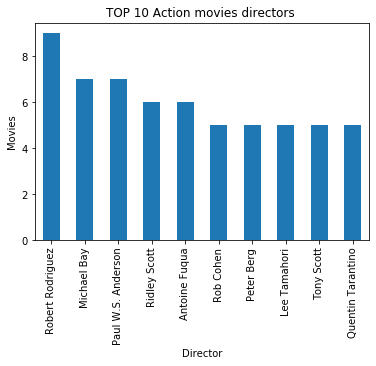

In [50]:
# Визуализация
data_plot = action_movies.explode('director').director.value_counts()[:10].copy()
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 Action movies directors ')
plot.set_xlabel('Director')
plot.set_ylabel('Movies')

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [51]:
answers['15'] = '3. Chris Hemsworth'

In [52]:
# Соберем отдельно кинофильмы вышедшие в 2012 году
movies_2012 = data[data.release_year == 2012].copy()

# Разобъем записи с актерским составом, применим метод explode и сгруппируем по актерам для подсчета выручки
movies_2012.cast = movies_2012.cast.str.split('|')
movies_2012.explode('cast').groupby('cast').revenue.sum().sort_values(ascending=False)[:1]

cast
Chris Hemsworth    2027450773
Name: revenue, dtype: int64

Text(0, 0.5, 'Revenue')

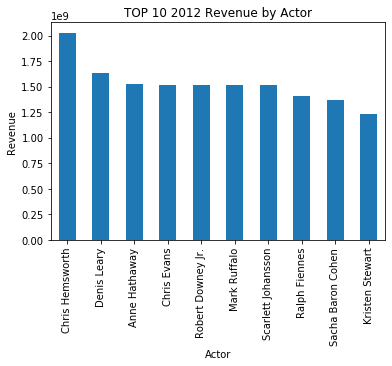

In [53]:
# Визуализация
data_plot = movies_2012.explode('cast').groupby('cast').revenue.sum().sort_values(ascending=False)[:10].copy()
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 2012 Revenue by Actor')
plot.set_xlabel('Actor')
plot.set_ylabel('Revenue')

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [54]:
answers['16'] = '3. Matt Damon'

In [55]:
# высокобюджетный фильм = бюджет больше среднего по датафрейму
high_budget_movies = data[data.budget > data.budget.mean()].copy()

high_budget_movies.cast = high_budget_movies.cast.str.split('|')
high_budget_movies.explode('cast').cast.value_counts()[:1]

Matt Damon    18
Name: cast, dtype: int64

Text(0, 0.5, 'Number of movies')

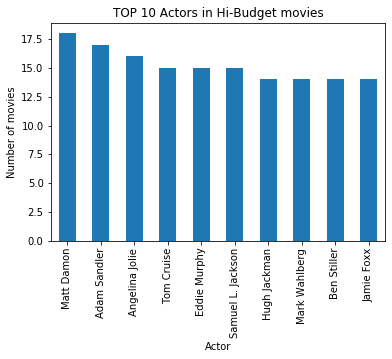

In [56]:
# Визуализация
data_plot = high_budget_movies.explode('cast').cast.value_counts()[:10].copy()
plot = data_plot.plot(kind='bar')
plot.set_title('TOP 10 Actors in Hi-Budget movies')
plot.set_xlabel('Actor')
plot.set_ylabel('Number of movies')

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [57]:
answers['17'] = '2. Action'

In [58]:
cage_movies = data[data.cast.str.contains('Nicolas Cage')].copy()

cage_movies.genres = cage_movies.genres.str.split('|')
cage_movies.explode('genres').genres.value_counts()

Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Family              3
Mystery             3
Animation           3
History             2
War                 1
Romance             1
Horror              1
Name: genres, dtype: int64

Text(0, 0.5, '')

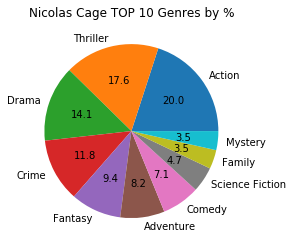

In [59]:
# Визуализация
plot = cage_movies.explode('genres').genres.value_counts()[:10].plot(kind='pie', autopct='%.1f')
plot.set_title('Nicolas Cage TOP 10 Genres by %')
plot.set_xlabel('')
plot.set_ylabel('')

# 18. Самый убыточный фильм от Paramount Pictures

In [60]:
answers['18'] = '1. K-19: The Widowmaker (tt0267626)'

In [61]:
# ВАРИАНТ 1
Paramount_movies = data[data.production_companies.str.contains('Paramount')].copy()
Paramount_movies[Paramount_movies.profit == Paramount_movies.profit.min()]

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
925,tt0267626,100000000,35168966,-64831034,K-19: The Widowmaker,Harrison Ford|Liam Neeson|Peter Sarsgaard|Joss...,Kathryn Bigelow,Fate has found its hero.,When Russia's first nuclear submarine malfunct...,138,Thriller|Drama|History,Paramount Pictures|Intermedia Films|National G...,2002-07-19,6.0,2002,7


In [62]:
# ВАРИАНТ 2
data[data.production_companies.str.contains('Paramount')].pivot_table(
    values='profit', index='original_title', aggfunc='sum').sort_values(by='profit').head()

,profit
original_title,
K-19: The Widowmaker,-64831034
Timeline,-60519261
Next,-51788987
Alfie,-46604061
Twisted,-24805000


# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [63]:
answers['19'] = '5. 2015'

In [64]:
# Вариант 1
data.groupby('release_year').revenue.sum().sort_values(ascending=False)

release_year
2015    25449202382
2014    23405862953
2013    23213799791
2012    23079001687
2011    22676791872
2010    21071204961
2009    20261791024
2008    18252781990
2007    18162406801
2004    15663430720
2005    15309425558
2006    14775042320
2003    14346123312
2002    14136361487
2001    13017764865
2000    10664099805
Name: revenue, dtype: int64

In [65]:
# Вариант 2
data.pivot_table(values='revenue', index='release_year', aggfunc='sum').sort_values(by='revenue', ascending=False)

,revenue
release_year,
2015,25449202382
2014,23405862953
2013,23213799791
2012,23079001687
2011,22676791872
2010,21071204961
2009,20261791024
2008,18252781990
2007,18162406801


Text(0, 0.5, 'Revenue')

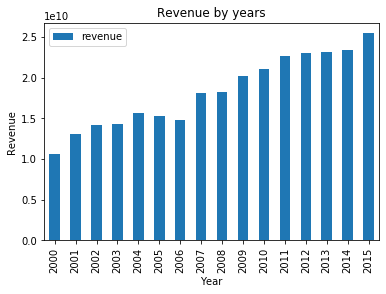

In [66]:
# Визуализация
data_plot = data.pivot_table(values='revenue', index='release_year', aggfunc='sum').copy()
plot = data_plot.plot(kind='bar')
plot.set_title('Revenue by years')
plot.set_xlabel('Year')
plot.set_ylabel('Revenue')

# 20. Какой самый прибыльный год для студии Warner Bros?

In [67]:
answers['20'] = '1. 2014'

In [68]:
data[data.production_companies.str.contains('Warner Bros')].pivot_table(
    values='revenue', index='release_year', aggfunc='sum').sort_values(by='revenue', ascending=False)

,revenue
release_year,
2014,3243064519
2007,3183675217
2008,3050595031
2010,3008712985
2011,2845393682
2003,2745493377
2009,2737954136
2004,2731933725
2013,2599953400


Text(0, 0.5, 'Revenue')

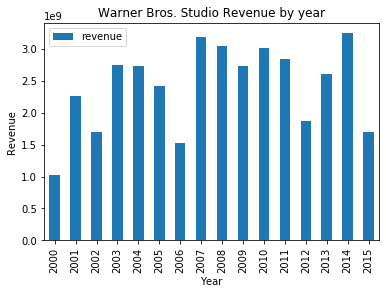

In [69]:
# Визуализация
data_plot = data[data.production_companies.str.contains('Warner Bros')].pivot_table(
    values='revenue', index='release_year', aggfunc='sum').copy()
plot = data_plot.plot(kind='bar')
plot.set_title('Warner Bros. Studio Revenue by year')
plot.set_xlabel('Year')
plot.set_ylabel('Revenue')

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [70]:
answers['21'] = '4. Сентябрь'

In [71]:
data.pivot_table(values='original_title', index='release_month', aggfunc='count',
                 margins=True).sort_values(by='original_title', ascending=False)

,original_title
release_month,
All,1889
9,227
12,190
10,186
8,161
3,156
4,149
6,147
11,146


Text(0, 0.5, 'Number of movies')

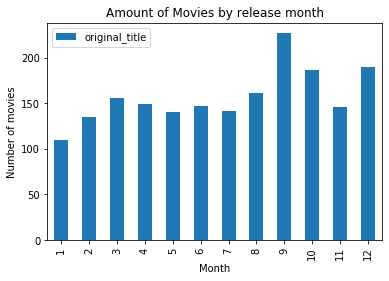

In [72]:
# Визуализация
data_plot = data.pivot_table(values='original_title', index='release_month', aggfunc='count', margins=False).copy()
plot = data_plot.plot(kind='bar')
plot.set_title('Amount of Movies by release month')
plot.set_xlabel('Month')
plot.set_ylabel('Number of movies')

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [73]:
answers['22'] = '2. 450'

In [74]:
# ВАРИАНТ 1
summer = [6, 7, 8]
data[data.release_month.isin(summer)].pivot_table(values='original_title', index='release_month', aggfunc='count', margins=True)

,original_title
release_month,
6,147
7,142
8,161
All,450


In [75]:
# ВАРИАНТ 2
data[data.release_month.isin(summer)].groupby('release_month').original_title.count().sum()

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [76]:
answers['23'] = '5. Peter Jackson'

In [77]:
# ВАРИАНТ 1
winter = [1, 2, 12]
winter_movies = data[data.release_month.isin(winter)].copy()
winter_movies.director = winter_movies.director.str.split('|')
winter_movies.explode('director').groupby('director').original_title.count().sort_values(ascending=False)

director
Peter Jackson            7
Steven Soderbergh        6
Clint Eastwood           6
Martin Scorsese          4
Adam Shankman            4
                        ..
Matt Bettinelli-Olpin    1
Matt Reeves              1
Matthew O'Callaghan      1
Matthew Vaughn           1
Jon Avnet                1
Name: original_title, Length: 358, dtype: int64

In [78]:
# ВАРИАНТ 2
winter_movies.explode('director').pivot_table(values='original_title', index='director',
                                              aggfunc='count').sort_values(by='original_title', ascending=False)

,original_title
director,
Peter Jackson,7
Steven Soderbergh,6
Clint Eastwood,6
Shawn Levy,4
Adam Shankman,4
...,...
John Luessenhop,1
John Musker,1
John Polson,1


# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [79]:
answers['24'] = '5. Four By Two Productions'

In [80]:
# Будем работать в отдельном датасете
data_copy = data.copy()
data_copy.production_companies = data_copy.production_companies.str.split('|')

# Создадим столбец с длиной названия фильма
data_copy['name_length'] = data_copy.original_title.str.len()

# Соберем сводную таблицу с аггрегирующей функцией - средняя длина названия фильма, отсортируем по убыванию
data_copy.explode('production_companies').pivot_table(values='name_length',
                                                      index='production_companies', aggfunc='mean').sort_values(by='name_length', ascending=False)

,name_length
production_companies,
Four By Two Productions,83.0
"Jim Henson Company, The",59.0
Dos Corazones,47.0
Polsky Films,46.0
Museum Canada Productions,46.0
...,...
Everest Entertainment,3.0
Berlanti Productions,3.0
Global Entertainment Group,2.0


# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [81]:
answers['25'] = '3. Midnight Picture Show'

In [82]:
data_copy['overview_length'] = data_copy.overview.str.len()
data_copy.explode('production_companies').pivot_table(values='overview_length',
                                                      index='production_companies', aggfunc='mean').sort_values(by='overview_length', ascending=False)

,overview_length
production_companies,
Midnight Picture Show,1000.0
Room 9 Entertainment,964.0
Brookwell-McNamara Entertainment,936.0
Lions Gate Family Entertainment,909.0
Crest Animation Productions,909.0
...,...
London Boulevard,74.0
Henceforth,74.0
Phantom Four,72.0


# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [83]:
answers['26'] = '1. Inside Out, The Dark Knight, 12 Years a Slave'

In [84]:
top1_movies = data[data.vote_average > [np.percentile(data.vote_average, 99)][0]].sort_values('vote_average', ascending=False)
display(top1_movies)

,imdb_id,budget,revenue,profit,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
599,tt0468569,185000000,1001921825,816921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8.1,2008,7
9,tt2096673,175000000,853708609,678708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,8.0,2015,6
34,tt3170832,6000000,35401758,29401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,Love knows no boundaries,Jack is a young boy of 5 years old who has liv...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,8.0,2015,10
118,tt0816692,165000000,621752480,456752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,8.0,2014,11
125,tt2084970,14000000,233555708,219555708,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,The true enigma was the man who cracked the code.,Based on the real life story of legendary cryp...,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,2014-11-14,8.0,2014,11
119,tt2015381,170000000,773312399,603312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,7.9,2014,7
128,tt2267998,61000000,369330363,308330363,Gone Girl,Ben Affleck|Rosamund Pike|Carrie Coon|Neil Pat...,David Fincher,You don't know what you've got 'til it's...,With his wife's disappearance having become th...,145,Mystery|Thriller|Drama,Twentieth Century Fox Film Corporation|Regency...,2014-10-01,7.9,2014,10
138,tt2278388,30000000,174600318,144600318,The Grand Budapest Hotel,Ralph Fiennes|Tony Revolori|F. Murray Abraham|...,Wes Anderson,A perfect holiday without leaving home.,The Grand Budapest Hotel tells of a legendary ...,99,Comedy|Drama,Fox Searchlight Pictures|Scott Rudin Productio...,2014-02-26,7.9,2014,2
370,tt1375666,160000000,825500000,665500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Your mind is the scene of the crime.,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,7.9,2010,7
872,tt0253474,35000000,120072577,85072577,The Pianist,Adrien Brody|Thomas Kretschmann|Frank Finlay|M...,Roman Polanski,Music was his passion. Survival was his master...,The Pianist is a film adapted from the biograp...,150,Drama|War,Bac Films|Canal+Polska|Heritage Films|Studio B...,2002-09-24,7.9,2002,9


# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [85]:
answers['27'] = '5. Daniel Radcliffe & Rupert Grint'

In [86]:
# Будем работать в отдельном датасете
data_copy1 = data.copy()

# Разобъем записи с актерским составом на списки
data_copy1.cast = data_copy1.cast.str.split('|')

# Сформируем список актерских двоек (tuples), применив комбинаторный итератор combinations
pairs_list = data_copy1.cast.apply(lambda x: list(combinations(x, 2))).to_list()

# Превратим получившийся список списков в простой список двоек
pairs_list = list(chain.from_iterable(pairs_list))

# Применим Counter для подсчета наиболее упоминаемых пар
Counter(pairs_list).most_common()[0]

(('Daniel Radcliffe', 'Rupert Grint'), 8)

# Submission

In [87]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': '5. Pirates of the Caribbean: On Stranger Tides (tt1298650)',
 '2': '2. Gods and Generals (tt0279111)',
 '3': '3. Winnie the Pooh (tt1449283)',
 '4': '2. 110',
 '5': '1. 107',
 '6': '5. Avatar (tt0499549)',
 '7': '5. The Lone Ranger (tt1210819)',
 '8': '1. 1478',
 '9': '4. The Dark Knight (tt0468569)',
 '10': '5. The Lone Ranger (tt1210819)',
 '11': '3. Drama',
 '12': '1. Drama',
 '13': '5. Peter Jackson',
 '14': '3. Robert Rodriguez',
 '15': '3. Chris Hemsworth',
 '16': '3. Matt Damon',
 '17': '2. Action',
 '18': '1. K-19: The Widowmaker (tt0267626)',
 '19': '5. 2015',
 '20': '1. 2014',
 '21': '4. Сентябрь',
 '22': '2. 450',
 '23': '5. Peter Jackson',
 '24': '5. Four By Two Productions',
 '25': '3. Midnight Picture Show',
 '26': '1. Inside Out, The Dark Knight, 12 Years a Slave',
 '27': '5. Daniel Radcliffe & Rupert Grint'}

In [88]:
# и убедиться что ни чего не пропустил)
len(answers)

27